In [20]:
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn.metrics import accuracy_score

from Classifier import PotentialKNeighborsClassifier
from Distance import *
from Kernel import *
from OutPut import *



In [21]:
iris_ds = datasets.load_iris()
numbers_of_features = 4
start_feature = 0

X = iris_ds.data
y = iris_ds.target
feature_names = iris_ds.feature_names

In [22]:
def show_classifier_result(clf, X_train, y_train, X_val, y_val):
    best_classifier = check_classifier(clf, X_train, y_train, X_val, y_val)
    return best_classifier

def check_classifier(classifier, X_train, y_train, X_val, y_val):
    trained_classifier, accuracy_list = cross_val_score_mod(classifier, X_train, y_train, 5)
    best_classifier = trained_classifier[np.argmax(accuracy_list)]
    accuracy = 0.0
    for i in range(len(accuracy_list)):
        accuracy += accuracy_score(y_val, trained_classifier[i].predict(X_val))
    print(accuracy_list)
    print("Accuracy %.4f" %  (accuracy / len(accuracy_list)))

    return best_classifier

def cross_val_score_mod(classifier, X, y, folds, shuffle = False):
    kf = KFold(n_splits = folds, shuffle = shuffle)
    trained_classifier = []
    accuracy_list = []
    for train_index, test_index in kf.split(X):
        X_train_kfold, X_test_kfold = X[train_index], X[test_index]
        y_train_kfold, y_test_kfold = y[train_index], y[test_index]
        classifier_fold = clone(classifier)
        classifier_fold.fit(X_train_kfold, y_train_kfold)
        prediction = classifier_fold.predict(X_test_kfold)
        accuracy = accuracy_score(y_test_kfold, prediction)
        trained_classifier.append(classifier_fold)
        accuracy_list.append(accuracy)
    return trained_classifier, accuracy_list

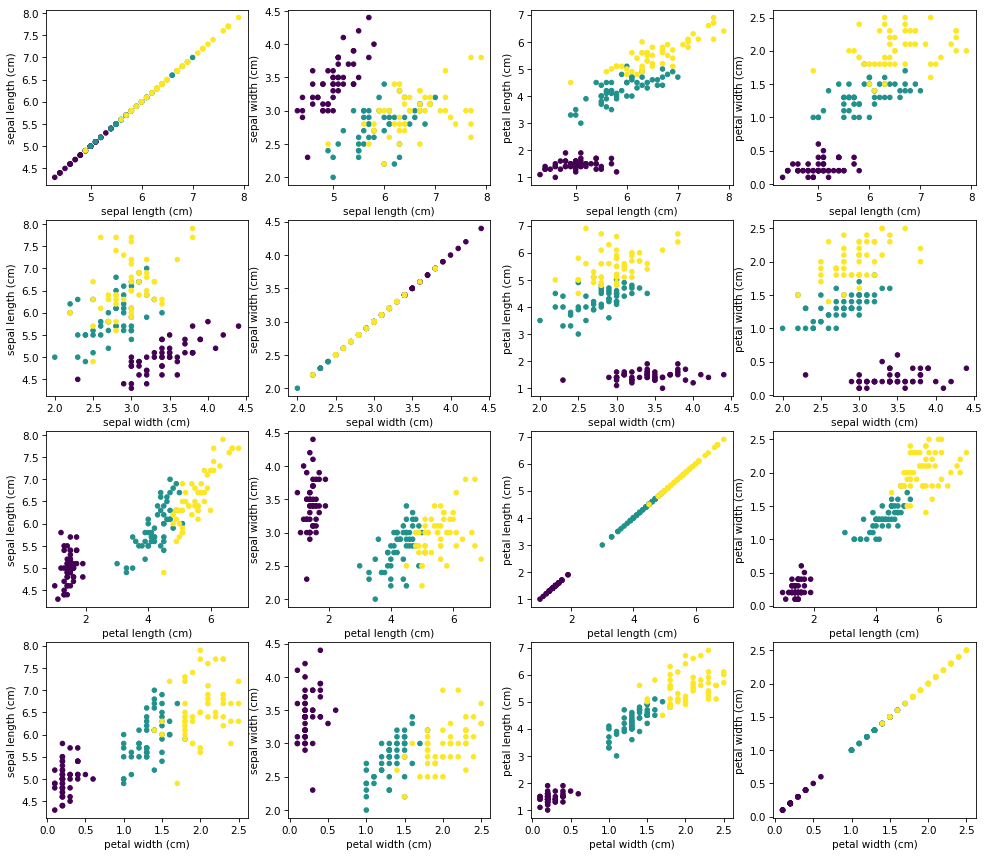

In [23]:
plt.figure(figsize=(16, 14), dpi=75)
count = 0
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, count + 1)
        count += 1
        plt.scatter(X[:, i], X[:, j], c=y, marker='.', s=75)
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])


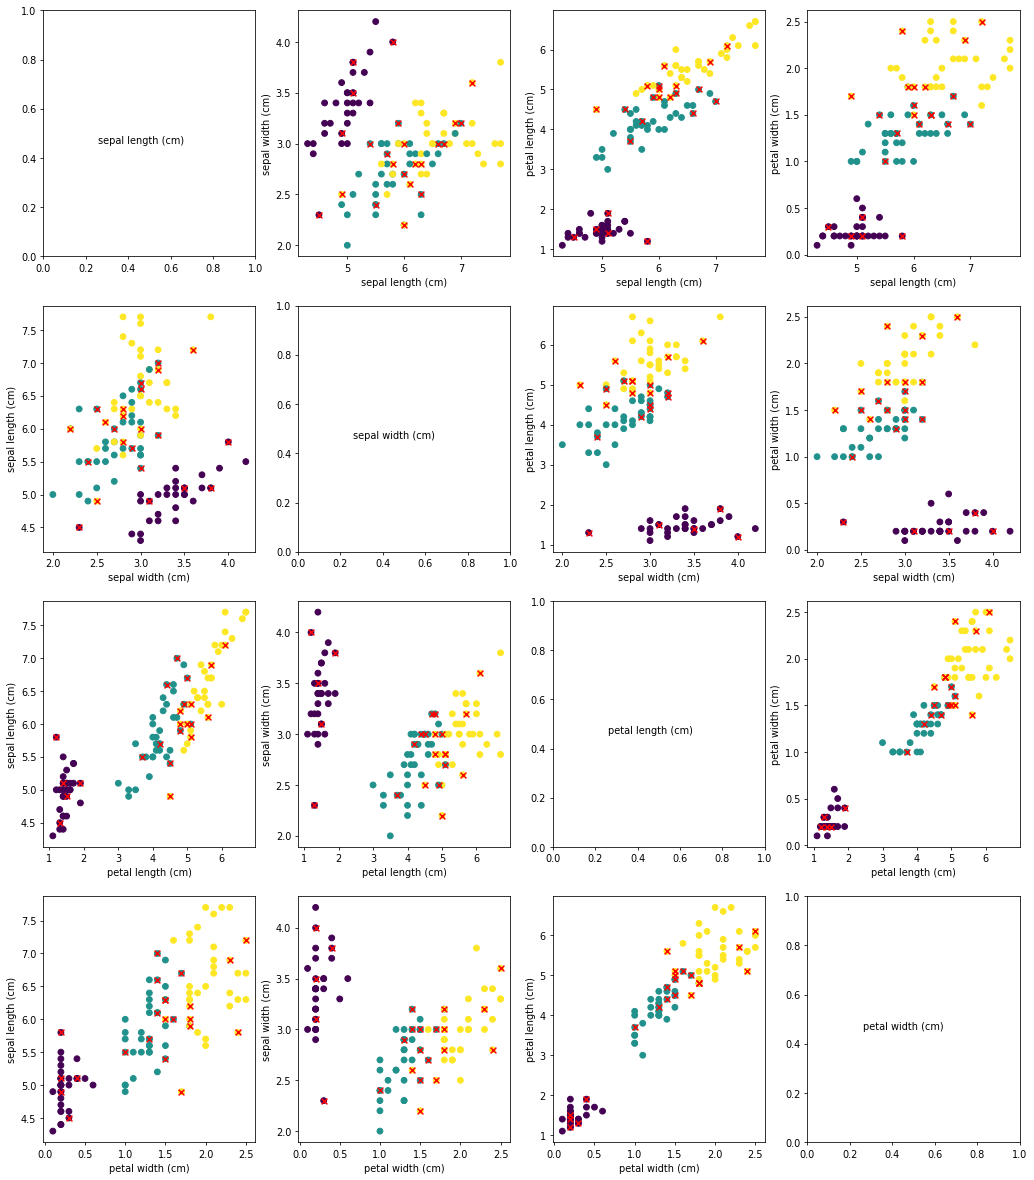

In [24]:
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size=0.3, random_state=42)
potential_class = PotentialKNeighborsClassifier(1, 5)
potential_class.fit(X_train_set, y_train_set)


plt.figure(figsize=(18, 21), dpi=70)
count = 0
for i in range(numbers_of_features):
    for j in range(numbers_of_features):
        highlighted_features = (i, j)
        highlighted_features_names = (feature_names[highlighted_features[0]], feature_names[highlighted_features[1]])
        plt.subplot(numbers_of_features, numbers_of_features, count + 1)
        count += 1
        if i == j:
            plt.text(0.26, 0.46, feature_names[i])
        else:
            plt.scatter(X_train_set[:, highlighted_features[0]], X_train_set[:, highlighted_features[1]],
                        c=y_train_set)
            plt.scatter(X_train_set[:, highlighted_features[0]][potential_class.indexes],
                        X_train_set[:, highlighted_features[1]][potential_class.indexes],
                        c='r', marker='x')
            plt.xlabel(highlighted_features_names[0])
            plt.ylabel(highlighted_features_names[1])
plt.show()

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[2 1 0 2 2 1 2 0 2 2 0 1 1 1 1 2 0 2 2 0 1 0 1 0 0 0 0 0 1 1]


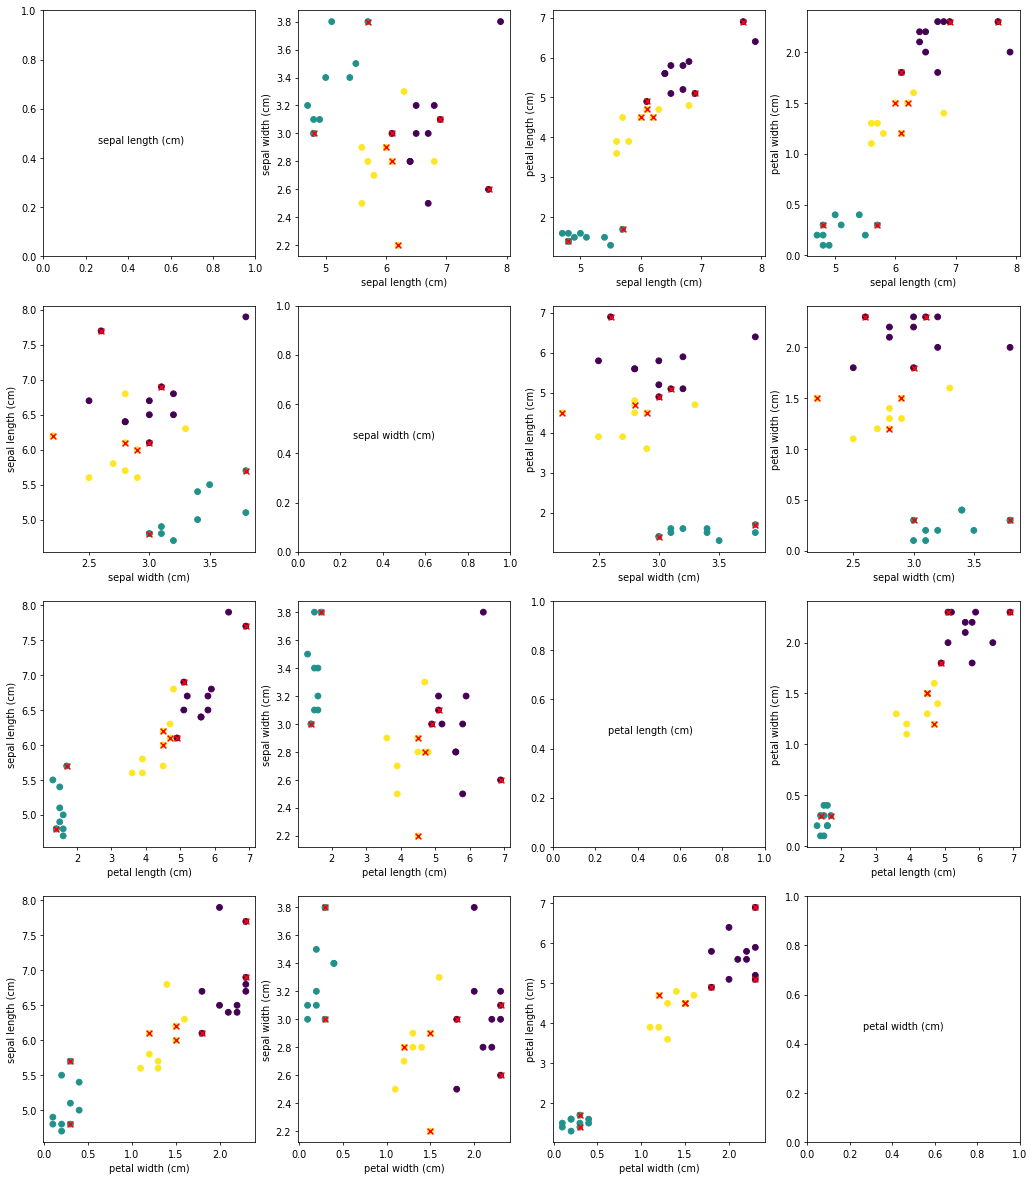

In [25]:
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size=0.2, random_state=42)
potential_class = PotentialKNeighborsClassifier(1, 5)
potential_class.fit(X_test_set, y_test_set)
print(y_test_set)

for i in range(len(y_test_set)):
    if y_test_set[i] == 0:
        y_test_set[i] = 1
        continue
    if y_test_set[i] == 1:
        y_test_set[i] = 2
        continue
    if y_test_set[i] == 2:
        y_test_set[i] = 0
        continue
print(y_test_set)    
    
plt.figure(figsize=(18, 21), dpi=70)
count = 0
for i in range(numbers_of_features):
    for j in range(numbers_of_features):
        highlighted_features = (i, j)
        highlighted_features_names = (feature_names[highlighted_features[0]], feature_names[highlighted_features[1]])
        plt.subplot(numbers_of_features, numbers_of_features, count + 1)
        count += 1
        if i == j:
            plt.text(0.26, 0.46, feature_names[i])
        else:
            plt.scatter(X_test_set[:, highlighted_features[0]], X_test_set[:, highlighted_features[1]],
                        c=y_test_set)
            plt.scatter(X_test_set[:, highlighted_features[0]][potential_class.indexes],
                        X_test_set[:, highlighted_features[1]][potential_class.indexes],
                        c='r', marker='x')
            plt.xlabel(highlighted_features_names[0])
            plt.ylabel(highlighted_features_names[1])
plt.show()

In [26]:
potential_Classifiers = []
windows = np.arange(0.5, 10, 0.5)
for window in windows:
    potential_Classifiers.append(PotentialKNeighborsClassifier(window, 5))

In [27]:
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size=0.2, random_state=42)

for i in range(len(potential_Classifiers)):
    show_classifier_result(potential_Classifiers[i], X_train_set, y_train_set, X_test_set, y_test_set)

[0.9583333333333334, 0.9583333333333334, 0.875, 0.9583333333333334, 0.9583333333333334]
Accuracy 0.9800
[0.9583333333333334, 1.0, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666]
Accuracy 0.9600
[0.9583333333333334, 0.9583333333333334, 0.9166666666666666, 0.9166666666666666, 0.9583333333333334]
Accuracy 0.9600
[0.9583333333333334, 0.9583333333333334, 0.9166666666666666, 0.8333333333333334, 0.875]
Accuracy 0.9667
[0.9583333333333334, 0.9583333333333334, 0.9166666666666666, 0.8333333333333334, 0.9583333333333334]
Accuracy 0.9800
[0.9583333333333334, 0.9583333333333334, 0.9166666666666666, 0.9166666666666666, 0.9583333333333334]
Accuracy 0.9800
[0.7916666666666666, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334]
Accuracy 0.9467
[0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9166666666666666, 0.9583333333333334]
Accuracy 0.9800
[0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9166666666666666, 0.9583333333333334]
Accu

[0.9583333333333334, 0.9583333333333334, 0.9166666666666666, 0.8333333333333334, 0.875]
Accuracy 0.9667


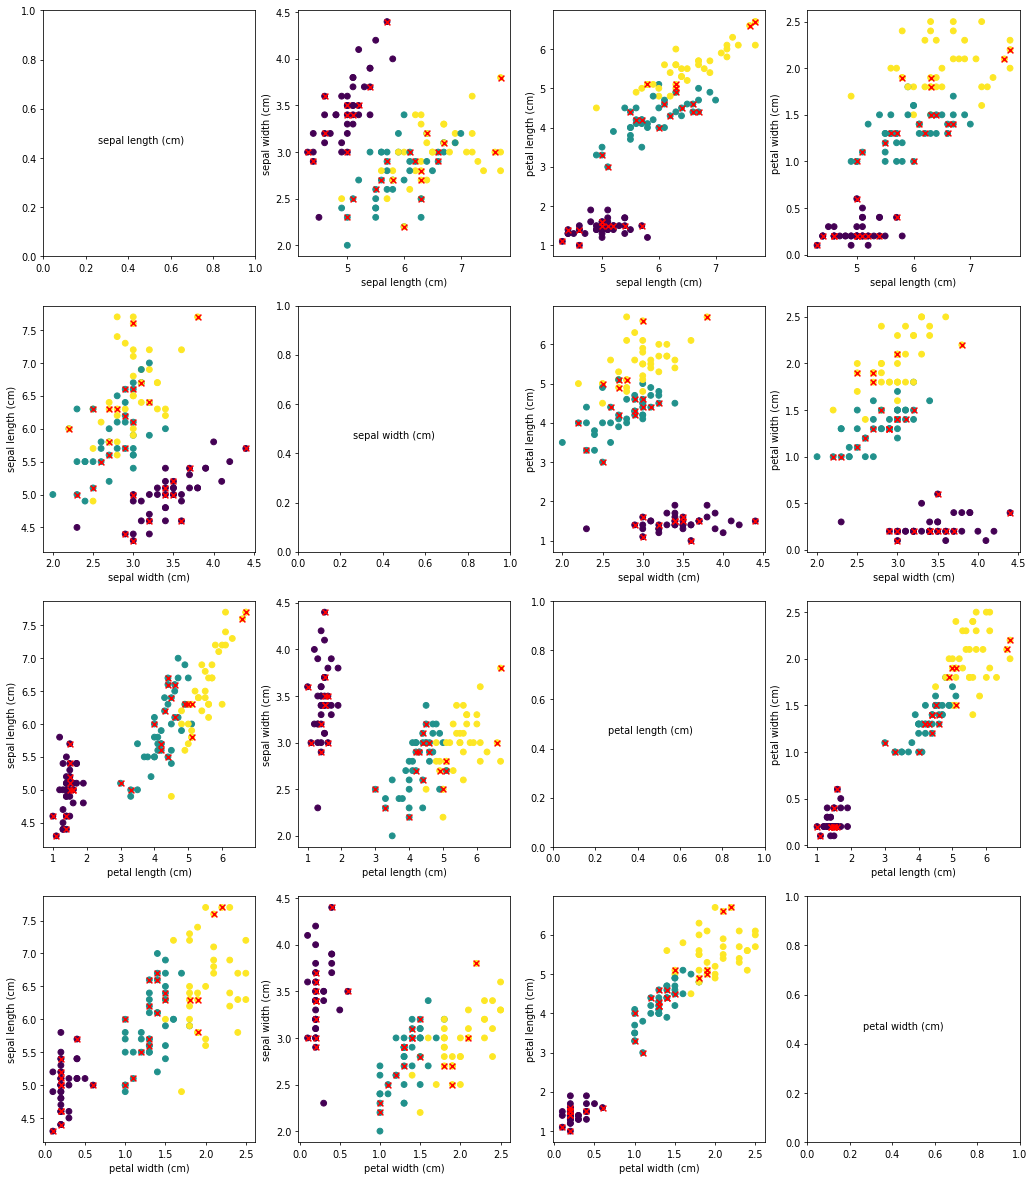

In [28]:
valid_classifier = show_classifier_result(potential_Classifiers[3], X_train_set, y_train_set, X_test_set, y_test_set)

plt.figure(figsize=(18, 21), dpi=70)
count = 0
for i in range(numbers_of_features):
    for j in range(numbers_of_features):
        highlighted_features = (i, j)
        highlighted_features_names = (feature_names[highlighted_features[0]], feature_names[highlighted_features[1]])
        plt.subplot(numbers_of_features, numbers_of_features, count + 1)
        count += 1
        if i == j:
            plt.text(0.26, 0.46, feature_names[i])
        else:
            plt.scatter(X_train_set[:, highlighted_features[0]], X_train_set[:, highlighted_features[1]],
                        c=y_train_set)

            correct_index = []
            for item in range(0, len(valid_classifier.gammas)):
                if int(valid_classifier.gammas[item]) != 0:
                    correct_index.append(item)
            plt.scatter(X_train_set[:, highlighted_features[0]][correct_index],
                        X_train_set[:, highlighted_features[1]][correct_index],
                        c='r', marker='x')
            plt.xlabel(highlighted_features_names[0])
            plt.ylabel(highlighted_features_names[1])
plt.show()

